# 8

In [50]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [52]:
Auto=load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [53]:
X=MS(['horsepower']).fit_transform(Auto)
y=Auto['mpg']
model=sm.OLS(y,X)


summarize(model.fit())

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


# (a)(1):TODO Is there a relationship between the predictor and the response?

## Yes

# (a)(2):TODO How strong is the relationship between the predictor and the response?

## The relationship is strong, as the p-value is less than 0.05.
# (a)(3):TODO Is the relationship positive or negative?

## The relationship is negative, as the coefficient is negative.


# (a)(4):TODO What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

## Predicted Value: 25.2

In [54]:
new_X=MS(['horsepower']).fit_transform(pd.DataFrame({'horsepower':[98]}))

model=model.fit()
prediction=model.get_prediction(new_X)

conf_int=prediction.conf_int(alpha=0.05)
pred_int=prediction.conf_int(obs=True,alpha=0.05)

In [55]:
conf_int

array([[23.97307896, 24.96107534]])

In [56]:
pred_int

array([[14.80939607, 34.12475823]])

## confidence interval: array([[23.97307896, 24.96107534]])
## prediction interval: array([[14.80939607, 34.12475823]])


Text(0.5, 1.0, 'MPG vs Horsepower with Regression Line')

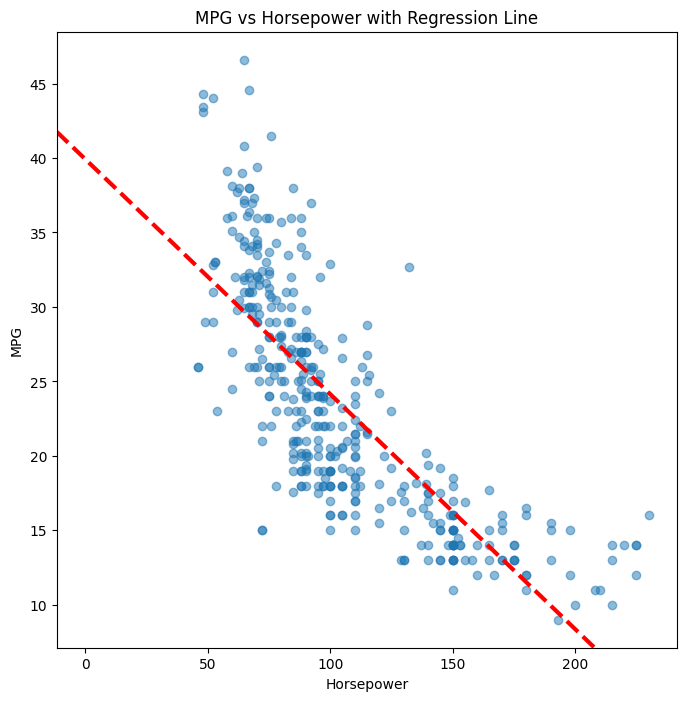

In [57]:
# 创建新的坐标轴并绘制散点图
fig, ax = subplots(figsize=(8, 8))
ax.scatter(Auto['horsepower'], Auto['mpg'], alpha=0.5)

# 获取回归系数
results=model
intercept = results.params.iloc[0]  # 截距
slope = results.params.iloc[1]      # 斜率

# 使用 axline 绘制回归线
# axline 需要 (x, y) 点和斜率，或者两个点
# 方法 2a: 使用点和斜率
ax.axline((0, intercept), slope=slope, color='r', linestyle='--', linewidth=3)

# 或者方法 2b: 使用两个点
# x_min, x_max = Auto['horsepower'].min(), Auto['horsepower'].max()
# y_min = intercept + slope * x_min
# y_max = intercept + slope * x_max
# ax.axline((x_min, y_min), (x_max, y_max), color='r', linestyle='--', linewidth=3)

# 设置标签
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_title('MPG vs Horsepower with Regression Line')

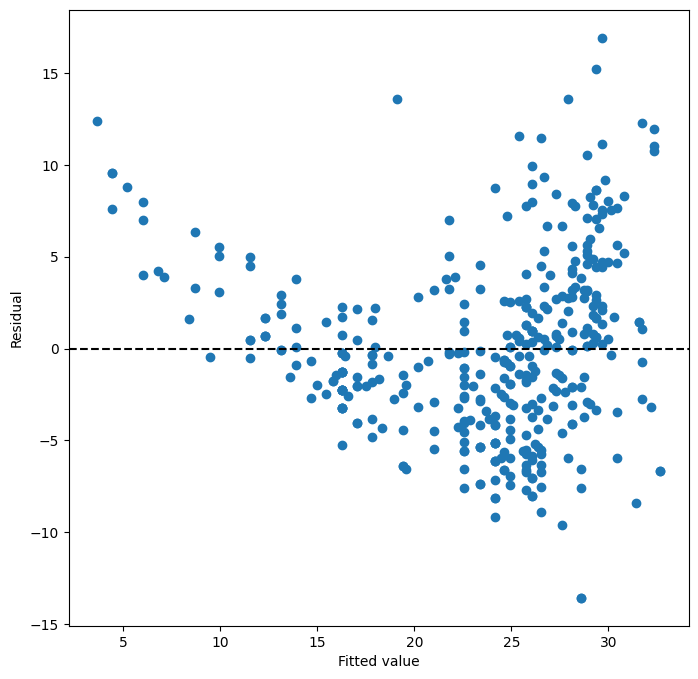

In [58]:
# 首先确保模型已拟合
results = model

# 诊断图 1: 残差图（Residuals vs Fitted Values）
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')  # 添加 y=0 的参考线

np.int64(115)

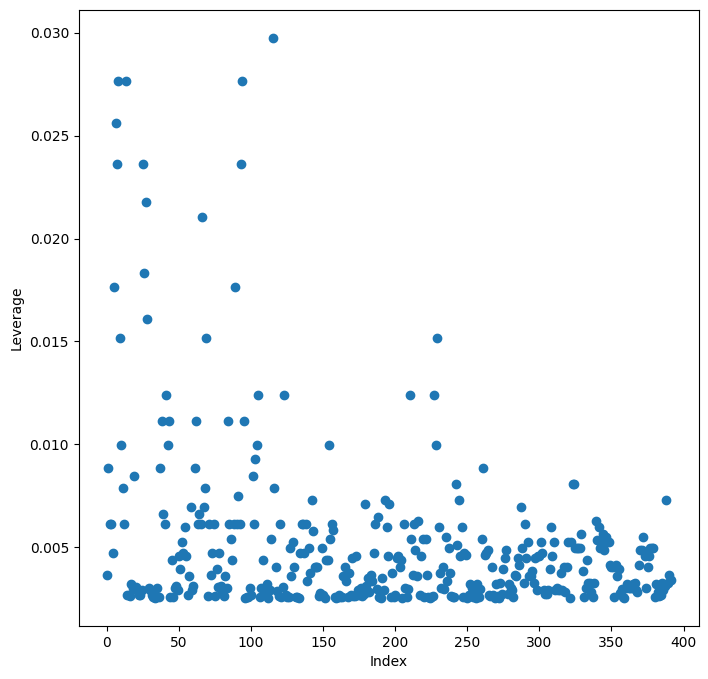

In [59]:
# 诊断图 2: 杠杆图（Leverage Plot）
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)  # 找出杠杆值最大的观测点

# 9

In [60]:
Auto=load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


# (a) TODO Produce a scatterplot matrix which includes all of the variables in the data set.

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

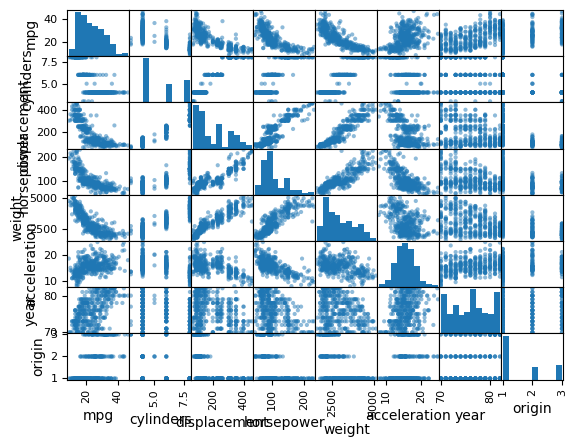

In [61]:
pd.plotting.scatter_matrix(Auto)

# (b) TODO Compute the matrix of correlations between the variables using the DataFrame.corr() method.

In [62]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


# (c) TODO Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results.Comment on the output.

In [63]:
y=Auto['mpg']
X=Auto.drop(columns=['mpg'])
X=MS(list(X.columns)).fit_transform(X)

model=sm.OLS(y,X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


# i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.

yes

## ii. Which predictors appear to have a statistically significant relationship to the response?

## weight,year,origin

# iii. What does the coefficient for the year variable suggest?

# It has positive effect on mpgs.

# (d) TODO Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

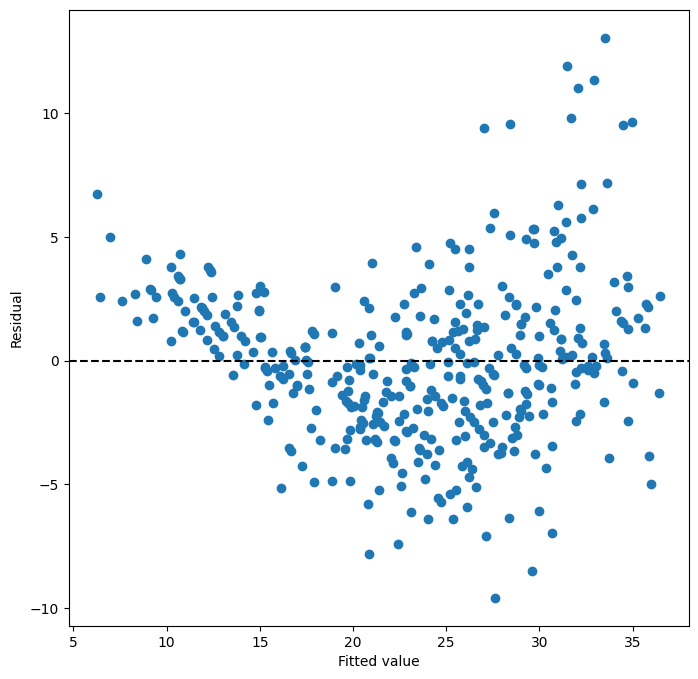

In [64]:
# 首先确保模型已拟合
results = model.fit()

# 诊断图 1: 残差图（Residuals vs Fitted Values）
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')  # 添加 y=0 的参考线

np.int64(13)

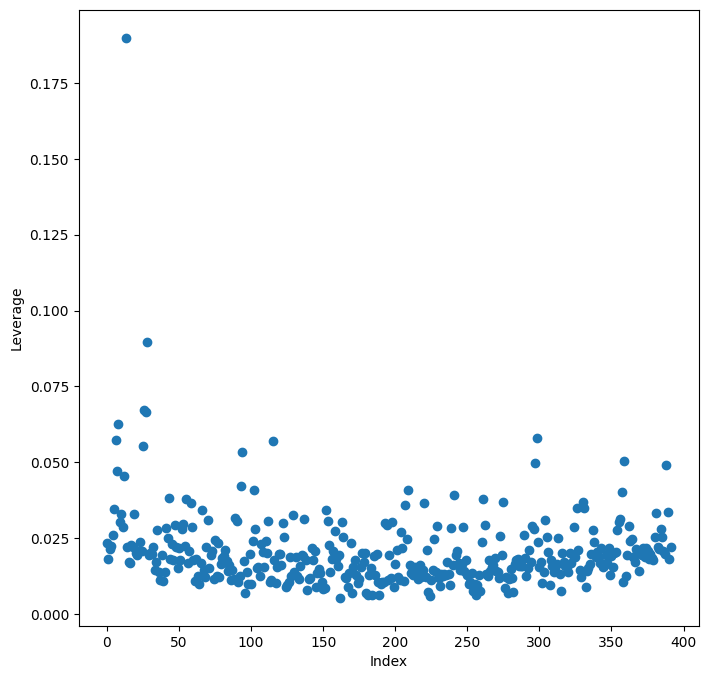

In [65]:
# 诊断图 2: 杠杆图（Leverage Plot）
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)  # 找出杠杆值最大的观测点

# (e) TODO Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [66]:
X=Auto.drop(columns=['mpg'])
X_interaction = MS(list(X.columns) + [('weight','year')]).fit_transform(X)

model1=sm.OLS(y,X_interaction)
summarize(model1.fit())


,coef,std err,t,P>|t|
intercept,-118.5635,13.376000,-8.864,0.000
cylinders,-0.1218,0.303000,-0.402,0.688
displacement,0.0129,0.007000,1.842,0.066
horsepower,-0.0288,0.013000,-2.236,0.026
weight,0.0304,0.005000,6.543,0.000
acceleration,0.1447,0.092000,1.574,0.116
year,2.0841,0.173000,12.033,0.000
origin,1.1736,0.260000,4.519,0.000
weight:year,-0.0005,0.000061,-8.002,0.000


## weight*year is statistically significant.

In [67]:
X=Auto.drop(columns=['mpg'])
X=MS([poly('weight',degree=2),poly('year',degree=2)]).fit_transform(X)

model2=sm.OLS(y,X)
summarize(model2.fit())



,coef,std err,t,P>|t|
intercept,23.4459,0.148,157.922,0.0
"poly(weight, degree=2)[0]",-108.2100,3.110,-34.796,0.0
"poly(weight, degree=2)[1]",31.3893,2.978,10.540,0.0
"poly(year, degree=2)[0]",60.7682,3.129,19.418,0.0
"poly(year, degree=2)[1]",15.0146,2.958,5.077,0.0


# The feature weight^2+weight, year^2+year are statistically significant.